### This KNN implementation from scratch uses the famous breast cancer data set. Below is a short description of the features

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)



In [95]:
#importing the necessary libraries to start off.. more libraries are imported later as and when required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [85]:
#the csv file comes without column names. The column names are hence added.

df = pd.read_csv("breast-cancer-wisconsin.csv",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [86]:
columns = ['Sample id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [87]:
df.columns = columns
df.head()

,Sample id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [88]:
# dropping the sample id column

df.drop('Sample id',inplace = True,axis = 1)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [90]:
#NO NULL VALUES FORTUNATELY IN OUR DATASET

In [91]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### A bit of data visualization to find good predictors for our target(Class)


In [92]:
import seaborn as sns

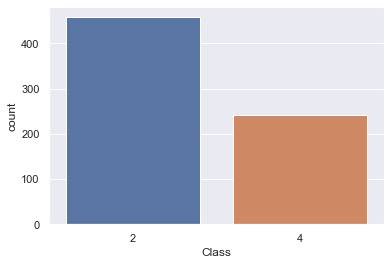

In [93]:
sns.countplot(x='Class', data = df)   # shows a slight imbalance in classes but its ignored for this implementation

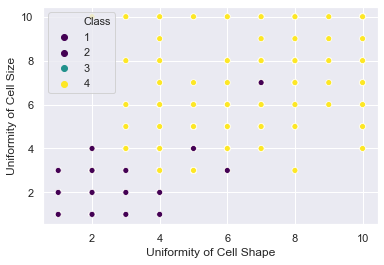

In [94]:
sns.scatterplot(x = 'Uniformity of Cell Shape', y ='Uniformity of Cell Size', data = df, hue = 'Class',palette = 'viridis')

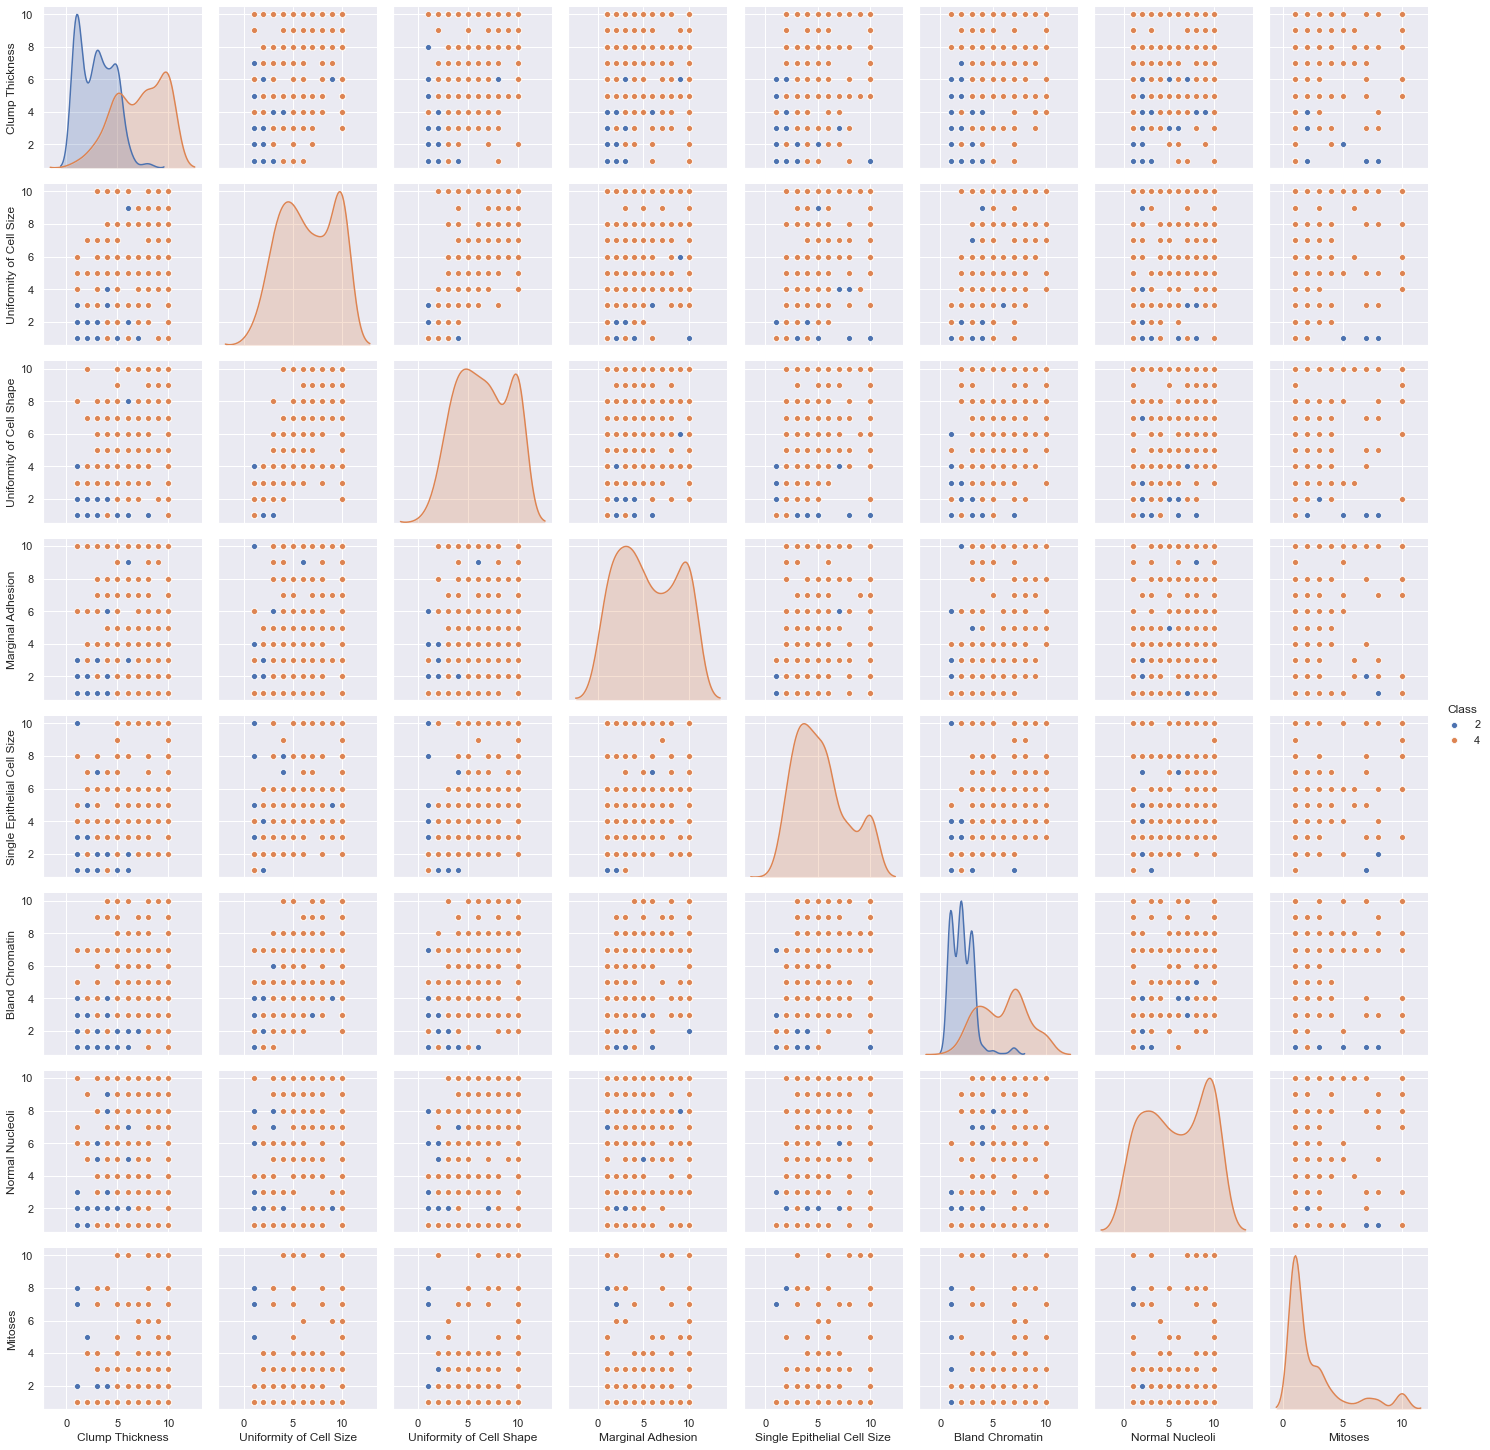

In [96]:
#pair plot helps in high level understanding of our data through visual graphs

sns.pairplot(hue = 'Class',data = df)

#### Looking at the pairplots it can be seen that certain predictors do a better job of separating the target classes. These graphs are plotted below to get a closer look.

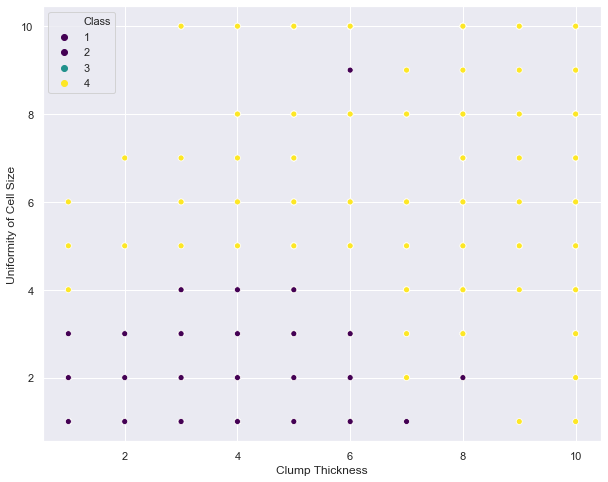

In [98]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x = 'Clump Thickness', y ='Uniformity of Cell Size', data = df, hue = 'Class',palette = 'viridis')

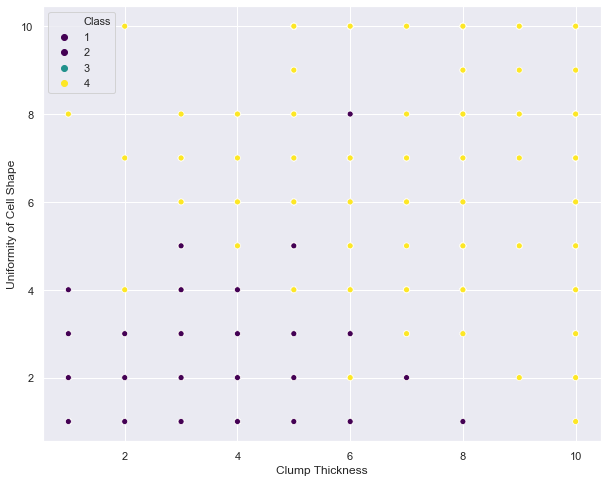

In [99]:
sns.scatterplot(y = 'Uniformity of Cell Shape', x ='Clump Thickness', data = df, hue = 'Class',palette = 'viridis')

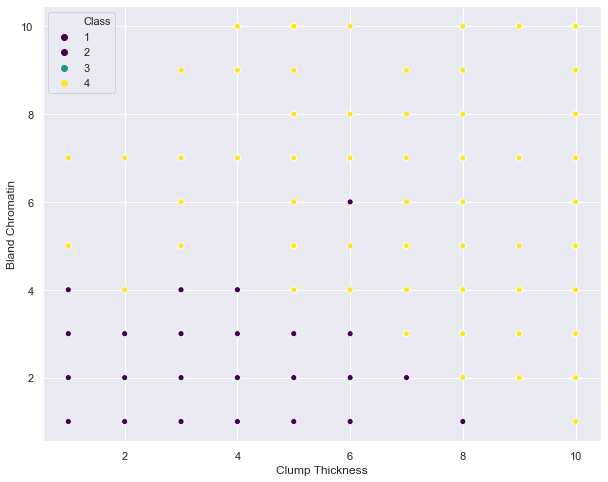

In [100]:
sns.scatterplot(x = 'Clump Thickness', y ='Bland Chromatin', data = df, hue = 'Class',palette = 'viridis')

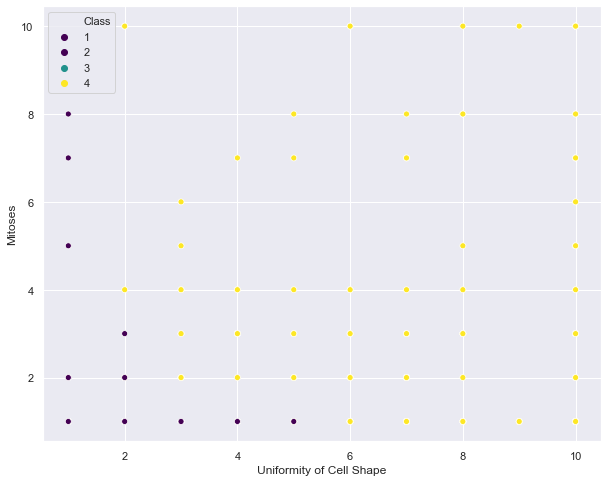

In [101]:
sns.scatterplot(x = 'Uniformity of Cell Shape', y ='Mitoses', data = df, hue = 'Class',palette = 'viridis')

Keeping the following columns since they are good independent predictors:
    
    1. Uniformity of Cell Size
    2.Uniformity of Cell Shape
    3.Clump Thickness
    
Removing all other predictors

In [102]:
dropped_columns = ['Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
df.drop(dropped_columns, axis = 1, inplace =True)

In [103]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Class
0,5,1,1,2
1,5,4,4,2
2,3,1,1,2
3,6,8,8,2
4,4,1,1,2


In [104]:
#Mapping class values from 2,4 to 1,2 respectively for sake of simplicity

df['Class'] = df['Class'].map({2:1,4:2})
df['Class'].value_counts()

1    458
2    241
Name: Class, dtype: int64

In [105]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Class
0,5,1,1,1
1,5,4,4,1
2,3,1,1,1
3,6,8,8,1
4,4,1,1,1


In [106]:
#Creating the X dataset containing all the feature variables and the Y dataset containing target class

X = df.drop('Class',axis = 1)
y = df['Class']

In [107]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape
0,5,1,1
1,5,4,4
2,3,1,1
3,6,8,8
4,4,1,1


In [23]:
X.shape , y.shape

((699, 3), (699,))

### Implementation starts here.

Defining a distance metric - Minkowski Distance

In [108]:
def minkowski(a,b,p=2):
    dist = 0
    for i in range(len(a)):
        dist += abs(a[i]-b[i])**p
        
    distance = dist**(1/p)
    
    return distance

In [109]:
minkowski(X.iloc[0].tolist(),X.iloc[1].tolist(),2)

4.242640687119285

In [110]:
#testing for a training point 

test_pt = X.iloc[2].tolist()
dist = []
for i in range(X.shape[0]):
    dist.append(minkowski(test_pt,X.iloc[i].tolist()))
dist_df = pd.DataFrame(data = dist, index = X.index, columns = ['dist'])
dist_df.head()

,dist
0,2.000000
1,4.690416
2,0.000000
3,10.344080
4,1.000000


In [111]:
dist_df = dist_df.sort_values(by = ['dist'])[:5]

In [112]:
from collections import Counter
counter = Counter(y[dist_df.index])
counter.most_common()[0][0]

1

In [113]:
#importing more libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [114]:
#splitting our data into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 20)
X_train.shape, X_test.shape

((559, 3), (140, 3))

In [115]:
#scaling the data because KNN is distance based algorithm

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
X_train[:5]

array([[ 0.57328074,  2.28913142,  2.31786331],
       [-0.49493237, -0.69367619, -0.74522319],
       [ 1.28542281,  0.30059301,  1.29683448],
       [-1.20707444, -0.69367619, -0.74522319],
       [-1.20707444, -0.69367619, -0.74522319]])

#### The knn_predict function defined below returns a list of classes corresponding the data points in test set.

In [118]:
from collections import Counter
def knn_predict(X_train,X_test,y_train,y_test,k=5,p=2):
    pred = []
    for row_test in X_test:
        dist = []
        for row_train in X_train:
            dist.append(minkowski(row_test,row_train,p)) 
            
        dist_df = pd.DataFrame(data = dist, index = y_train.index, columns = ['dist'])
        dist_df_nn = dist_df.sort_values(by = ['dist'],axis = 0)[:k]
        counter = Counter(y_train[dist_df_nn.index])
        
        pred.append(counter.most_common()[0][0])
        
    return pred

In [119]:
#These are the predicted classes for X_test dataset

predictions = knn_predict(X_train,X_test,y_train,y_test,5,2)
print(predictions)
print(len(predictions))

[1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2]
140


In [125]:
#An accuracy function is defined to test how many points our knn_predict function classified correctly

def accuracy(predictions,y_test):
    correct = 0
    for p1,p2 in zip(predictions,y_test):
        if p1==p2:
            correct += 1
    return correct/len(predictions)

In [126]:
accuracy = accuracy(predictions,y_test)
print("The accuracy of our self implemented knn algorithm is :",round(accuracy*100,2),"%")

The accuracy of our self implemented knn algorithm is : 95.71 %


## Using scikit learn's implementation to compare the accuracy

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors = 5, p =2)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy using sklearn library :",round(accuracy_score(y_test,y_pred),2)*100,"%")

Accuracy using sklearn library : 96.0 %


#### The accuracies in both implementations are similar in this case